# Notebook for postprocessing

In [39]:
# Importing useful modules

%matplotlib inline

from __future__ import division

import sys
import os
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, AutoLocator, AutoMinorLocator
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import math

from collections import OrderedDict

import xpsi

from xpsi import PostProcessing

# choose a seed for the notebook if you want caching to be useful
# and the notebook exactly reproducible
PostProcessing.set_random_seed(42)

from xpsi.global_imports import gravradius

In [40]:
# Setting path to import additional module
path="./Modules/" 
sys.path.append(path)

In [41]:
# Importing main
import main as ST

In [42]:
# Let's see the free parameters fo the our model
ST.likelihood

Free parameters
---------------
mass: Gravitational mass [solar masses].
radius: Coordinate equatorial radius [km].
distance: Earth distance [kpc].
cos_inclination: Cosine of Earth inclination to rotation axis.
hot__phase_shift: The phase of the hot region, a periodic parameter [cycles].
hot__super_colatitude: The colatitude of the centre of the superseding region [radians].
hot__super_radius: The angular radius of the (circular) superseding region [radians].
hot__super_temperature: log10(superseding region effective temperature [K]).

In [43]:
# Now let's set the names, the bounds and the labels of the free parameters
#for later use

In [44]:
# Settings names, bounds and labels

ST.names=['mass','radius','distance','cos_inclination','hot__phase_shift',
          'hot__super_colatitude','hot__super_radius','hot__super_temperature']

# We will use the same bounds used during sampling
ST.bounds = {'mass':(1.0,1.6),
             'radius':(10,13),
             'distance':(0.5,2.0),
             'cos_inclination':(0,1),
             'hot__phase_shift':(-0.25, 0.75),
             'hot__super_colatitude':(0.001, math.pi/2 - 0.001),
             'hot__super_radius':(0.001, math.pi/2.0 - 0.001),
             'hot__super_temperature':(6., 7.)}

# Now the labels
ST.labels = {'mass': r"M\;\mathrm{[M}_{\odot}\mathrm{]}",
              'radius': r"R_{\mathrm{eq}}\;\mathrm{[km]}",
              'distance': r"D \;\mathrm{[kpc]}",
              'cos_inclination': r"\cos(i)",
              'hot__phase_shift': r"\phi_{p}\;\mathrm{[cycles]}",
              'hot__super_colatitude': r"\Theta_{spot}\;\mathrm{[rad]}",
              'hot__super_radius': r"\zeta_{spot}\;\mathrm{[rad]}",
              'hot__super_temperature': r"\mathrm{log10}(T_{spot}\;[\mathrm{K}])"}

In [45]:
# Let's also add the compactness because we also added that
#extra parameter to be derived

ST.names +=['compactness']
ST.bounds['compactness']=(gravradius(1.0)/16.0, 1.0/3.0)
ST.labels['compactness']= r"M/R_{\mathrm{eq}}"

In [46]:
# Getdist settings, usually no need to be changed
getdist_kde_settings = {'ignore_rows': 0,
                         'min_weight_ratio': 1.0e-10,
                         'contours': [0.683, 0.954, 0.997],
                         'credible_interval_threshold': 0.001,
                         'range_ND_contour': 0,
                         'range_confidence': 0.001,
                         'fine_bins': 1024,
                         'smooth_scale_1D': 0.4,
                         'num_bins': 100,
                         'boundary_correction_order': 1,
                         'mult_bias_correction_order': 1,
                         'smooth_scale_2D': 0.4,
                         'max_corr_2D': 0.99,
                         'fine_bins_2D': 512,
                         'num_bins_2D': 40}



In [47]:
# Let's now load the run

ST.runs = xpsi.Runs.load_runs(ID='ST',
                               run_IDs=['run'],
                               roots=['ST_live_1000_eff_0.3_seed0'],
                               base_dirs=['./Outputs/'],
                               use_nestcheck=[True],
                               kde_settings=getdist_kde_settings,
                               likelihood=ST.likelihood,
                               names=ST.names,
                               bounds=ST.bounds,
                               labels=ST.labels,
                               implementation='multinest',
                               overwrite_transformed=True)

# Coner plots

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'distance']
plotting:  ['mass', 'cos_inclination']
plotting:  ['mass', 'hot__phase_shift']
plotting:  ['mass', 'hot__super_colatitude']
plotting:  ['mass', 'hot__super_radius']
plotting:  ['mass', 'hot__super_temperature']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'distance']
plotting:  ['radius', 'cos_inclination']
plotting:  ['radius', 'hot__phase_shift']
plotting:  ['radius', 'hot__super_colatitude']
plotting:  ['radius', 'hot__super_radius']
plotting:  ['radius', 'hot__super_temperature']
plotting:  ['radius', 'compactness']
plotting:  ['distance', 'cos_inclination']
plotting:  ['distance', 'hot__phase_shift']
plotting:  ['distance', 'hot__super_colatitude']
plotting:  ['distance', 'hot__super_radius']
plotting:  ['distance', 'hot__super_temperat

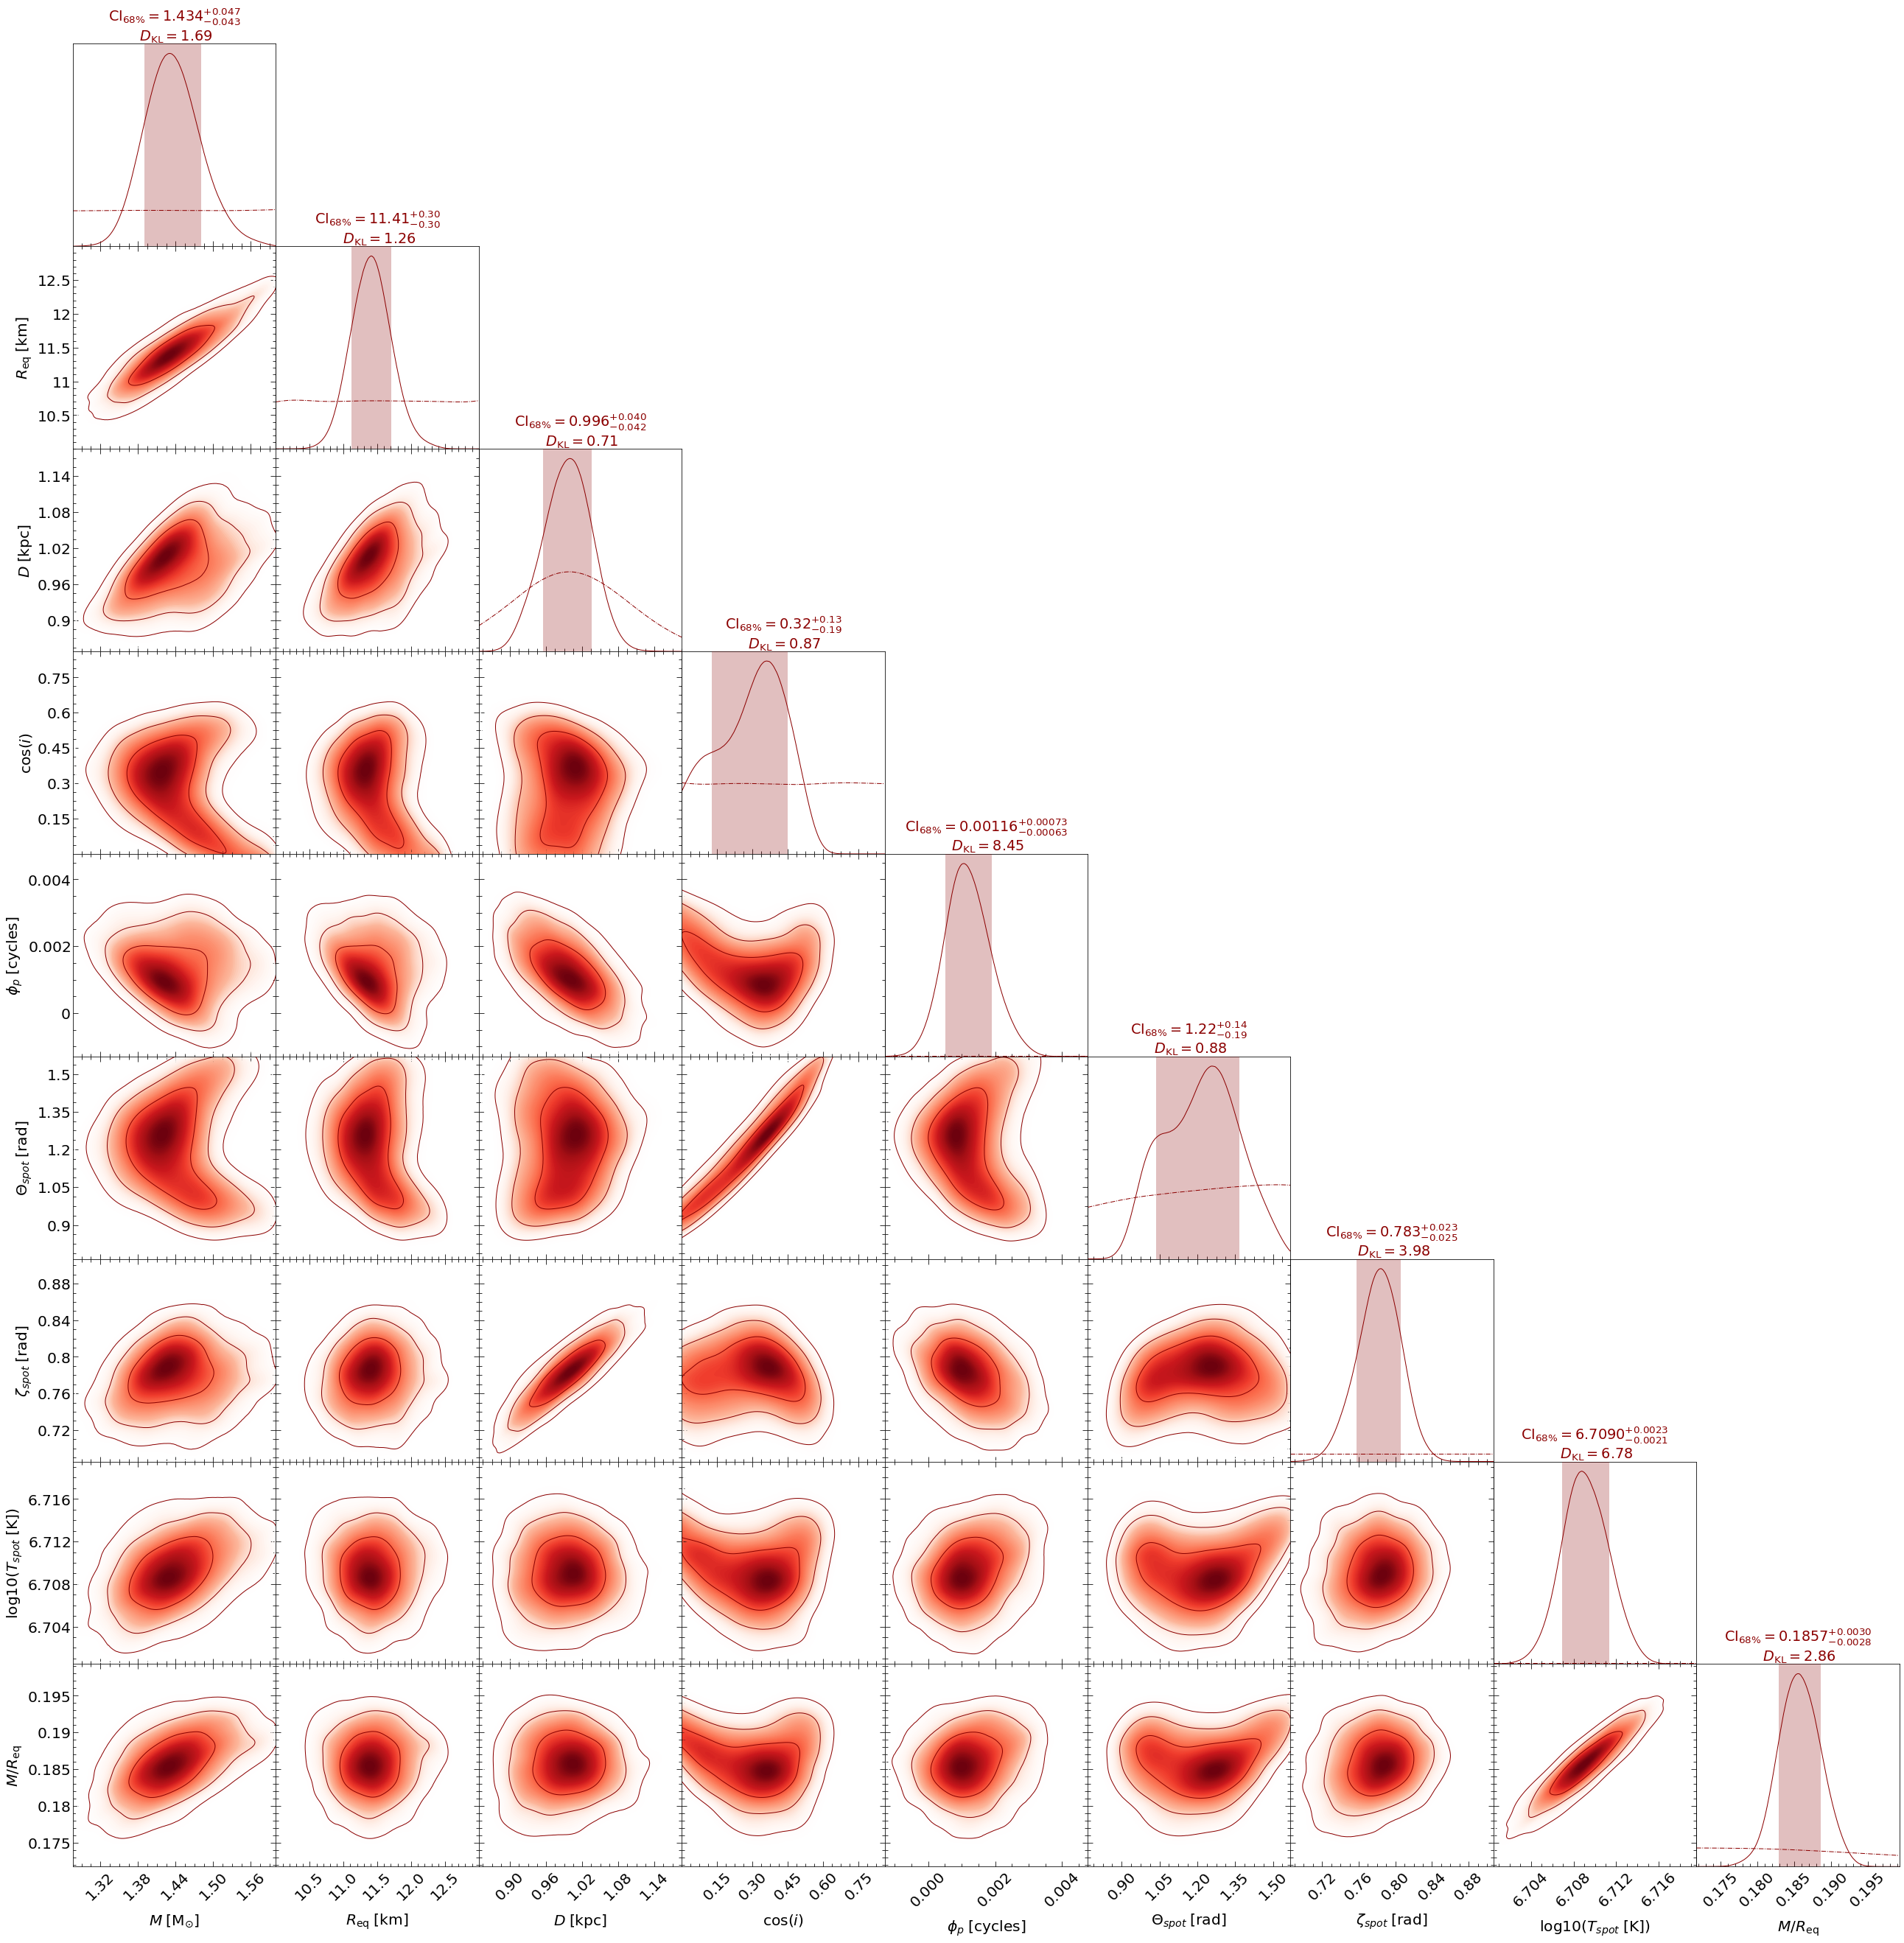

In [48]:
# Looking now at the infered  all parameters


pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
_ = pp.plot(
     params=ST.names,
    
     IDs=OrderedDict([('ST', ['run',]),]),
     prior_density=True,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=False,
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run',
     credible_interval_1d=True,
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     x_label_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('lab_fontsize', 1.35),
                              ('axes_fontsize', 'lab_fontsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500,
     scale_ymax=1.1)


Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'compactness']
Adding 1D marginal prior density functions...
Plotting prior for posterior ST...
Drawing samples from the joint prior...
Samples drawn.
Estimating 1D marginal KL-divergences in bits...
mass KL-divergence = 1.6920...
radius KL-divergence = 1.2603...
compactness KL-divergence = 2.8594...
Estimated 1D marginal KL-divergences.
Added 1D marginal prior density functions.
Veneering spines and axis ticks...
Veneered.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


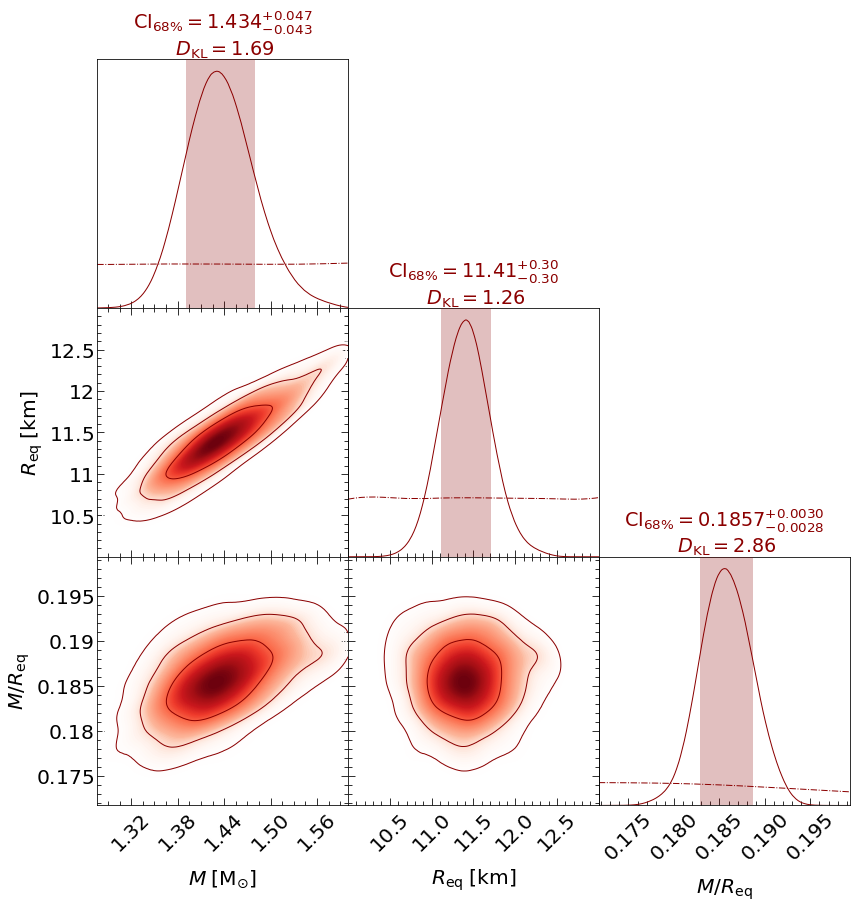

In [49]:
# Now let's plot a subset of those parameters, say : Mass, Radius and Compactness


_ = pp.plot(
     params=["mass", "radius", "compactness"],
    
     IDs=OrderedDict([('ST', ['run',]),]),
     prior_density=True,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=False,
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run',
     credible_interval_1d=True,
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     x_label_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('lab_fontsize', 1.35),
                              ('axes_fontsize', 'lab_fontsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500,
     scale_ymax=1.1)


In [50]:
# For the sake of example, let's assume one has to multiple runs for the same model and
# wants to plots them all on a same plot.

# Here, I have two runs, one perform fixing multinest seed to 0, and the second fixing
# the  seed to 42


# Loading the runs



ST.runs = xpsi.Runs.load_runs(ID='ST',
                               run_IDs=['run_seed0','run_seed42'],
                               roots=['ST_live_1000_eff_0.3_seed0','ST_live_1000_eff_0.3_seed42'],
                               base_dirs=['./Outputs/',
                                         './Outputs/'],
                               use_nestcheck=[True]*2,
                               kde_settings=getdist_kde_settings,
                               likelihood=ST.likelihood,
                               names=ST.names,
                               bounds=ST.bounds,
                               labels=ST.labels,
                               implementation='multinest',
                               overwrite_transformed=True)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'distance']
plotting:  ['mass', 'cos_inclination']
plotting:  ['mass', 'hot__phase_shift']
plotting:  ['mass', 'hot__super_colatitude']
plotting:  ['mass', 'hot__super_radius']
plotting:  ['mass', 'hot__super_temperature']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'distance']
plotting:  ['radius', 'cos_inclination']
plotting:  ['radius', 'hot__phase_shift']
plotting:  ['radius', 'hot__super_colatitude']
plotting:  ['radius', 'hot__super_radius']
plotting:  ['radius', 'hot__super_temperature']
plotting:  ['radius', 'compactness']
plotting:  ['distance', 'cos_inclination']
plotting:  ['distance', 'hot__phase_shift']
plotting:  ['distance', 'hot__super_colatitude']
plotting:  ['distance', 'hot__super_radius']
plotting:  ['distance', 'hot__super_temperat

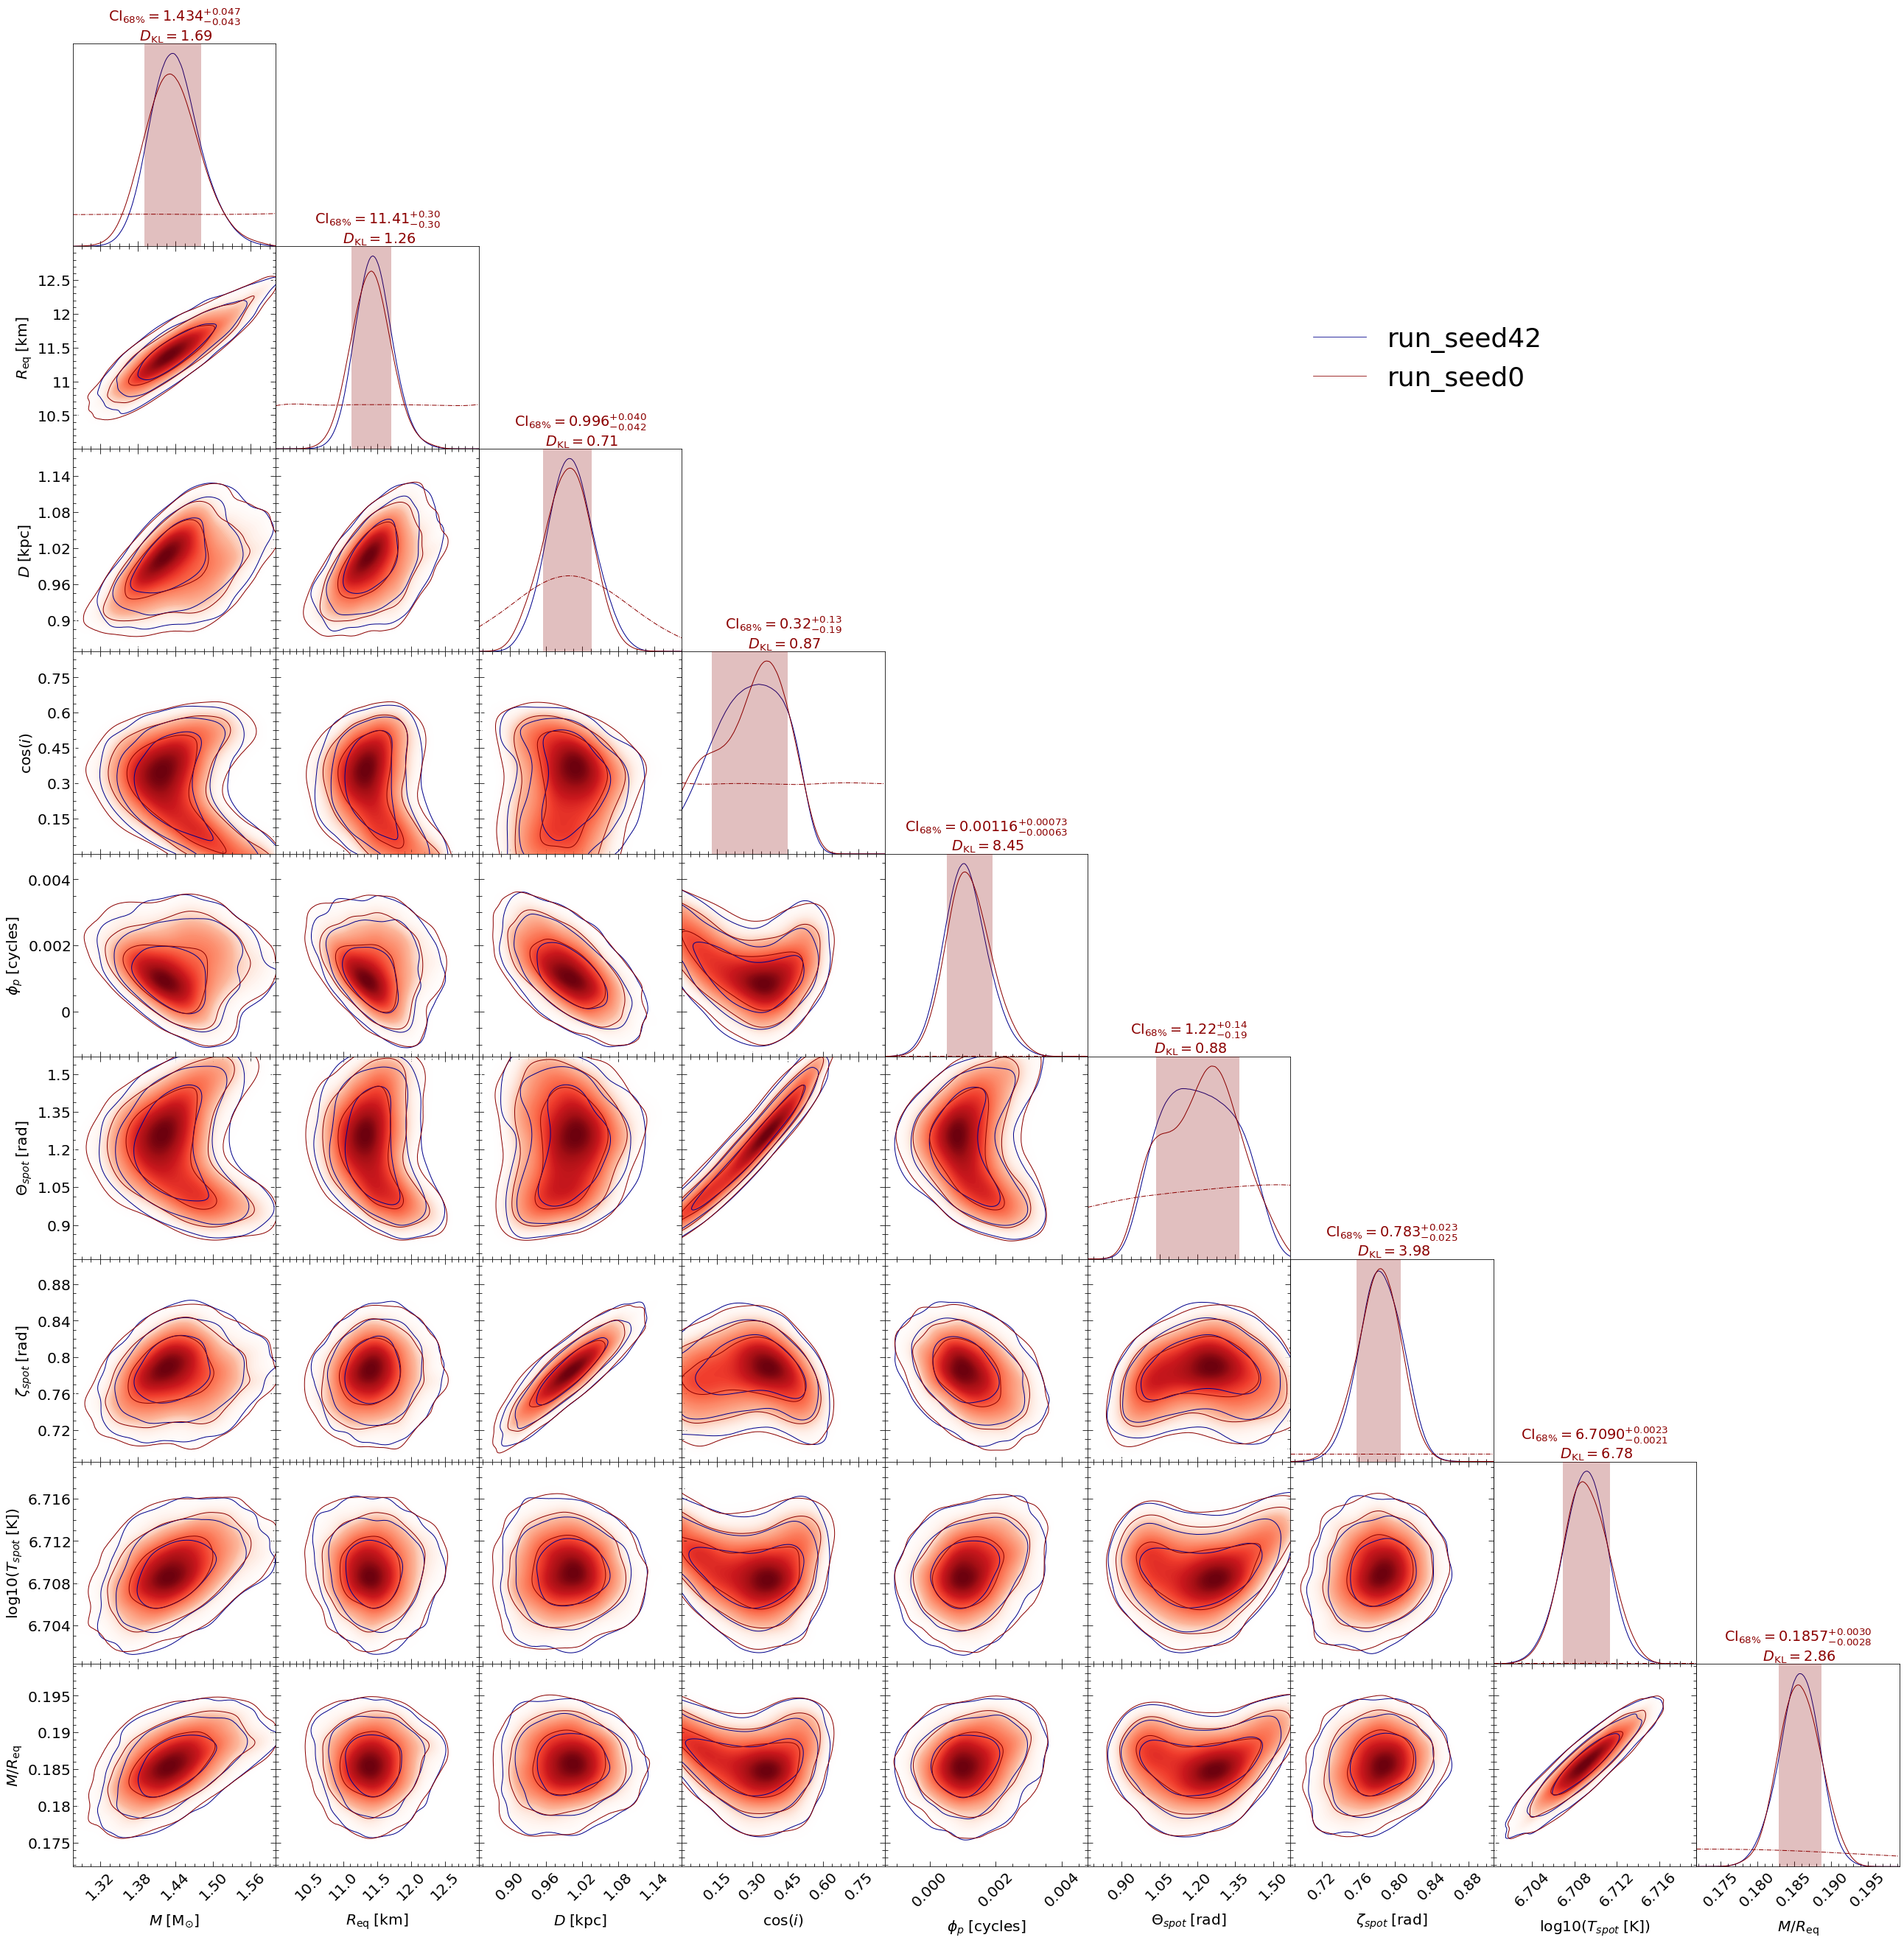

In [51]:
# Plotting the runs

pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
_ = pp.plot(
     params=ST.names,
    
     IDs=OrderedDict([('ST', ['run_seed0','run_seed42',]),]),
     prior_density=True,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=False,
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run_all',
     credible_interval_1d=True,
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     x_label_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 3.0),
                              ('lab_fontsize', 1.35),
                              ('axes_fontsize', 'lab_fontsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500,
     scale_ymax=1.1)


In [52]:
# Assuming that one knows the values that have been used to produce the 
# data and wants to show them

# Our case: 

ST.truths={'mass': 1.4,                               # Mass in solar Mass
          'radius': 12.,                              # Equatorial radius in km
          'distance': 1.0,                            # Distance in kpc
          'cos_inclination': math.cos(60*np.pi/180),  # Cosine of Earth inclination to rotation axis
          'hot__phase_shift': 0.0,                    # Phase shift
          'hot__super_colatitude': 70*np.pi/180,      # Colatitude of the centre of the superseding region
          'hot__super_radius': 0.75,                  # Angular radius of the (circular) superseding region
          'hot__super_temperature':6.7}               # Temperature in log 

ST.truths['compactness']=gravradius(ST.truths['mass'])/ST.truths['radius']



In [53]:
#ST.truths['compactness']

In [54]:
# Loading the run again :)

ST.runs = xpsi.Runs.load_runs(ID='ST',
                               run_IDs=['run'],
                               roots=['ST_live_1000_eff_0.3_seed0'],
                               base_dirs=['./Outputs/'],
                               use_nestcheck=[True],
                               kde_settings=getdist_kde_settings,
                               likelihood=ST.likelihood,
                               names=ST.names,
                               bounds=ST.bounds,
                               labels=ST.labels,
                               truths=ST.truths, # Adding this line
                               implementation='multinest',
                               overwrite_transformed=True)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'distance']
plotting:  ['mass', 'cos_inclination']
plotting:  ['mass', 'hot__phase_shift']
plotting:  ['mass', 'hot__super_colatitude']
plotting:  ['mass', 'hot__super_radius']
plotting:  ['mass', 'hot__super_temperature']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'distance']
plotting:  ['radius', 'cos_inclination']
plotting:  ['radius', 'hot__phase_shift']
plotting:  ['radius', 'hot__super_colatitude']
plotting:  ['radius', 'hot__super_radius']
plotting:  ['radius', 'hot__super_temperature']
plotting:  ['radius', 'compactness']
plotting:  ['distance', 'cos_inclination']
plotting:  ['distance', 'hot__phase_shift']
plotting:  ['distance', 'hot__super_colatitude']
plotting:  ['distance', 'hot__super_radius']
plotting:  ['distance', 'hot__super_temperat

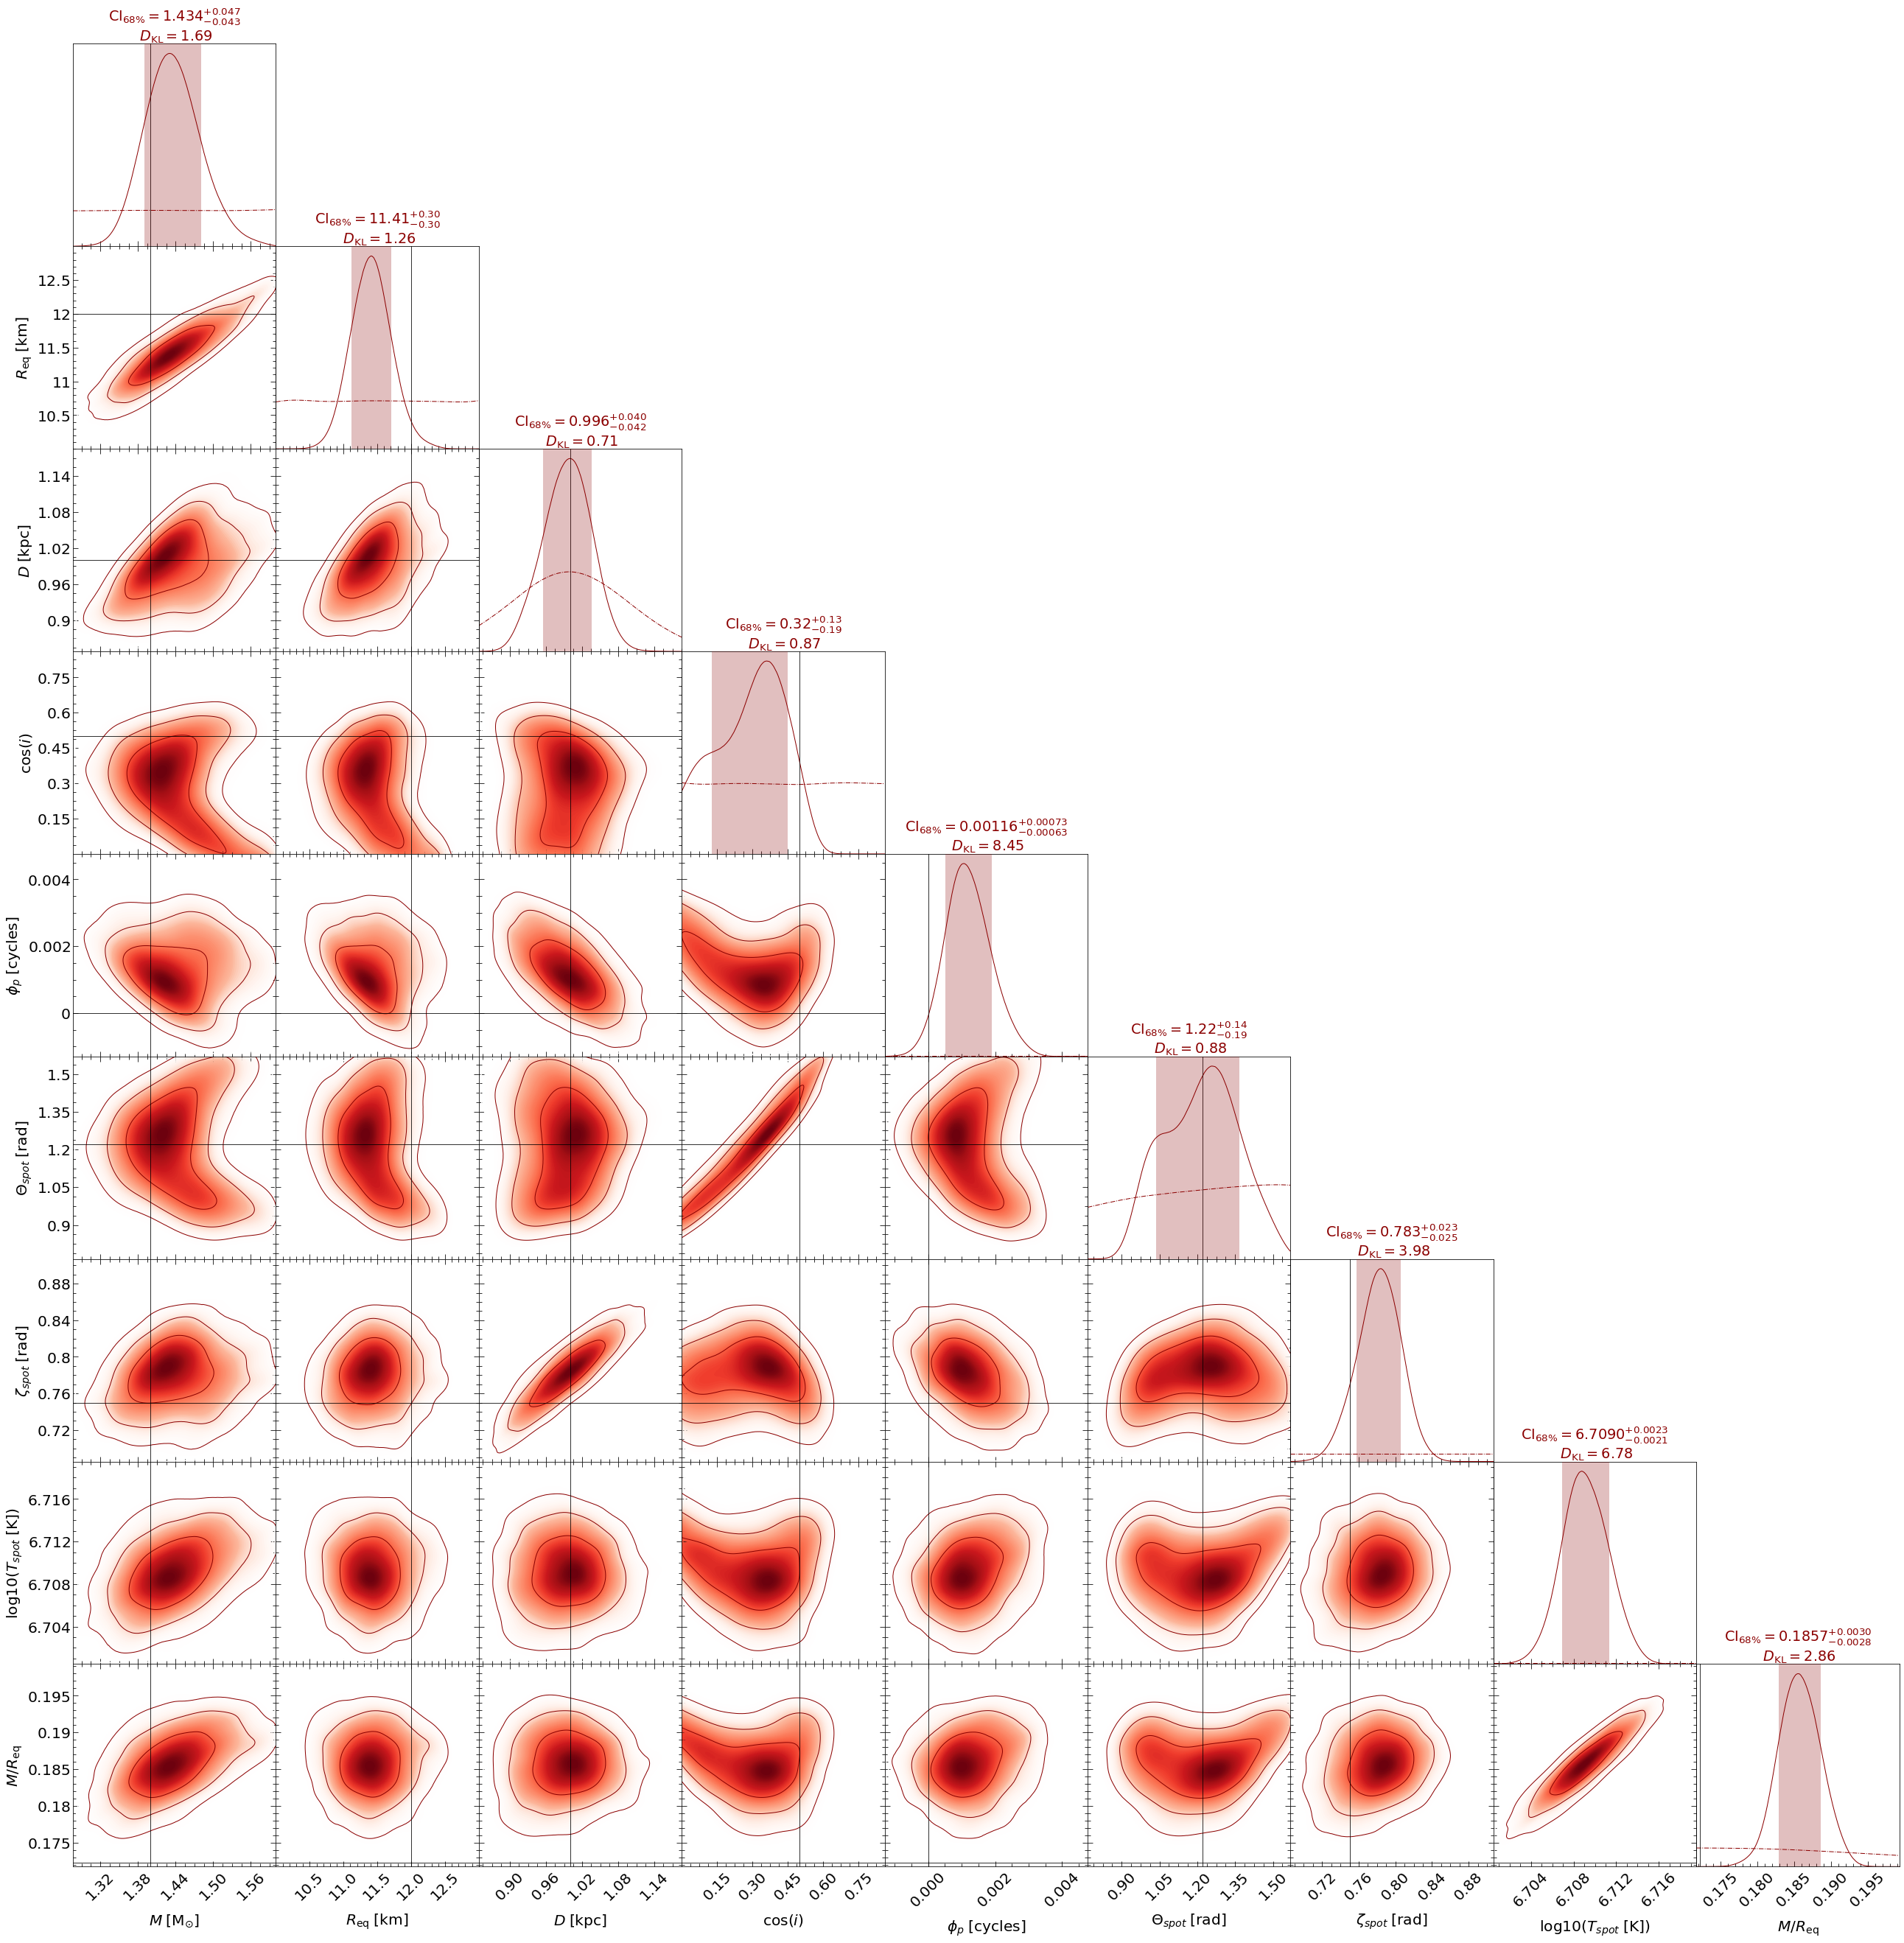

In [55]:
# Looking now at the infered  all parameters


pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
_ = pp.plot(
     params=ST.names,
    
     IDs=OrderedDict([('ST', ['run',]),]),
     prior_density=True,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=True, # Turn this to true
     write=False,
     ext='.png',
     maxdots=3000,
     root_filename='run',
     credible_interval_1d=True,
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     x_label_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('lab_fontsize', 1.35),
                              ('axes_fontsize', 'lab_fontsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500,
     scale_ymax=1.1)


In [56]:
# Let's now assume that one wants to get the values of the credible
# intervals shown on the plots.


credible_intervvals=pp.val_cred

print(credible_intervvals)

[[1.434e+00 4.300e-02 4.700e-02]
 [1.141e+01 3.000e-01 3.000e-01]
 [9.960e-01 4.200e-02 4.000e-02]
 [3.200e-01 1.900e-01 1.300e-01]
 [1.160e-03 6.300e-04 7.300e-04]
 [1.220e+00 1.900e-01 1.400e-01]
 [7.830e-01 2.500e-02 2.300e-02]
 [6.709e+00 2.100e-03 2.300e-03]
 [1.857e-01 2.800e-03 3.000e-03]]


# Residual plot

Instantiating a residual plotter for posterior checking...
Residual plotter instantiated.
Plotting signals for posterior checking...
Curating set of runs for posterior plotting...
Run set curated.
Handling posterior ST...
Checking whether an existing cache can be read:
Creating new cache file...
Attempting to archive existing cache file in a subdirectory...
Targeting subdirectory: ./archive.
Exisiting cache file archived in subdirectory ./archive.
Initialising cache file...
Cache file initialised.
Cache file created.
Cache state determined.


Signal caching loop:   0%|          | 0/100 [00:00<?, ?it/s]

ResidualPlot object iterating over samples...
ResidualPlot object finished iterating.
ResidualPlot object finalizing...
ResidualPlot object finalized.
Writing plot to disk...
ResidualPlot instance plot will be written to path ./ST.run__signalplot_residuals.pdf...
Written.
Handled posterior ST.
Plotted signals for posterior checking.


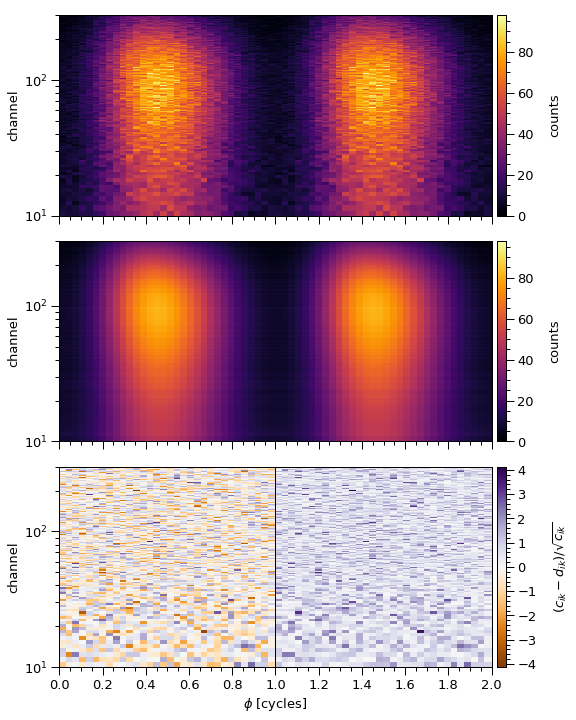

In [57]:
# Now let's plot the resudual of the first run
pp = xpsi.SignalPlotter([ST.runs])
pp.plot(IDs=OrderedDict([('ST', ['run']),
                        ]),
        combine=False, # use these controls if more than one run for a posterior
        combine_all=False,
        force_combine=False,
        only_combined=False,
        force_cache=True,
        nsamples=100,
        plots = {'ST': xpsi.ResidualPlot()})

pp.plots["ST"].fig


In [58]:
# End